In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [62]:
import pandas as pd
import numpy as np


In [63]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [64]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
print(df.shape)

(10000, 14)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [68]:
df.duplicated().sum()

0

In [69]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [70]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [71]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [72]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [73]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [75]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [76]:
X_train.shape

(8000, 11)

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [101]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [112]:
model = Sequential()
#hidden layer1 connected to input
model.add(Dense(8,activation='relu',input_dim=11))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='relu'))


In [113]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 96        
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 6)                 54        
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


In [115]:
history=model.fit(X_train_scaled,y_train,epochs=150,validation_split=0.2)

Epoch 1/150
200/200 [==============================] - 1s 3ms/step - loss: 1.0193 - accuracy: 0.7656 - val_loss: 0.6314 - val_accuracy: 0.7844
Epoch 2/150
200/200 [==============================] - 1s 3ms/step - loss: 0.5493 - accuracy: 0.7834 - val_loss: 0.5044 - val_accuracy: 0.7931
Epoch 3/150
200/200 [==============================] - 1s 3ms/step - loss: 0.5071 - accuracy: 0.7959 - val_loss: 0.4762 - val_accuracy: 0.7950
Epoch 4/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7956 - val_loss: 0.4661 - val_accuracy: 0.7981
Epoch 5/150
200/200 [==============================] - 1s 3ms/step - loss: 0.4736 - accuracy: 0.7989 - val_loss: 0.4594 - val_accuracy: 0.8031
Epoch 6/150
200/200 [==============================] - 1s 3ms/step - loss: 0.4643 - accuracy: 0.8005 - val_loss: 0.4603 - val_accuracy: 0.8037
Epoch 7/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.8025 - val_loss: 0.4609 - val_accuracy: 0.8056

In [116]:
model.layers[0].get_weights()

[array([[-0.3634347 , -0.4949006 , -0.10523283, -0.26914716,  0.07993158,
          0.3294066 , -0.32239002,  0.2895489 ],
        [ 0.6575174 ,  0.26988798, -0.70676965, -0.13261777,  0.4336277 ,
          0.54654264, -0.1777685 , -0.4056824 ],
        [-0.04266371, -0.07652104, -0.05752611,  0.18346576, -0.03646274,
         -0.23775566, -0.1929914 , -0.298942  ],
        [ 0.04760315,  0.3492383 ,  0.01941064, -0.20164022, -0.54908717,
          0.51799476,  0.40678754, -0.28083223],
        [ 0.02849706,  0.96675426,  0.0984014 , -0.06992323, -0.8640108 ,
          0.40980977, -0.94168836, -0.9433801 ],
        [-0.04343978, -0.01932117, -0.11864648, -0.06459618, -0.23974565,
         -0.2568107 ,  0.13482113, -0.3783355 ],
        [ 0.43746665, -0.21023874, -0.14005938, -0.01254932, -0.23223989,
         -0.41833776, -0.23254085, -0.34034345],
        [ 0.04067852,  0.00191911,  0.03169376,  0.15018997,  0.2384627 ,
          0.04123782, -0.14664969,  0.414773  ],
        [-0.1706

In [117]:
model.layers[1].get_weights()

[array([[-0.38503802,  0.28616324, -0.27856848,  0.3781123 , -0.8427561 ,
          0.5869835 , -0.05922939, -0.12536043],
        [ 0.45859352,  0.63016135,  0.04180274, -0.20335858, -0.7120375 ,
          0.00211206,  0.40693846,  0.04407061],
        [-0.63994575,  0.05472007,  0.07634335,  0.07396788,  0.2857756 ,
          0.2648006 ,  0.38162905, -0.29817134],
        [-0.00390833, -0.49577123,  0.32065898,  0.03619627, -0.5970019 ,
         -0.365963  , -0.40849882,  0.03071773],
        [-0.03891477, -0.325906  , -0.93062747, -0.24492805, -0.02654389,
          0.16355617, -0.40513673,  0.79268414],
        [ 0.2927321 ,  0.13056277, -0.8945411 , -0.4022237 , -0.68000466,
          0.2751141 ,  0.38637835,  0.18786874],
        [-0.46077144, -1.4087447 ,  0.08666781, -0.6432148 , -0.5046135 ,
         -0.1941909 , -0.0958795 ,  0.2832756 ],
        [ 0.64605474, -0.03090659,  0.00983245,  0.2715429 ,  0.4133348 ,
         -0.42685387, -1.1723546 , -0.3115511 ]], dtype=float32),

In [119]:
model.layers[2].get_weights()

[array([[ 0.39734682,  0.1874437 , -0.5152537 , -0.4157853 , -0.3676755 ,
          0.48022664],
        [ 0.55819947,  0.10844654,  0.33320728, -0.38900685,  0.02510411,
          0.00332781],
        [ 0.05808519, -0.85666037,  0.40210438, -1.1160607 , -0.46411845,
          0.10762723],
        [-0.436029  , -0.8678315 ,  0.13013399, -0.11431319,  0.15392222,
         -0.28341666],
        [ 0.06681091, -0.27013817, -0.29442912, -1.002113  , -0.38898528,
         -1.3035029 ],
        [-0.05318015, -0.21456148,  0.1397742 , -0.9092607 , -0.51501966,
          0.7451713 ],
        [ 0.02546917,  0.23442411,  0.26525158, -0.35101432, -0.5623549 ,
         -0.4691919 ],
        [ 0.09877558,  0.37256736, -0.02093017,  0.43050024,  0.14064968,
         -0.5543973 ]], dtype=float32),
 array([ 0.04574462, -0.12273745, -0.17637861,  0.12231322, -0.32498363,
        -0.13108678], dtype=float32)]

In [120]:
y_log= model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [122]:
y_pred=np.where(y_log>0.5,1,0)

In [123]:
history.history

{'loss': [1.0192914009094238,
  0.5492839217185974,
  0.5070865750312805,
  0.4836578071117401,
  0.47364822030067444,
  0.4642795920372009,
  0.45578113198280334,
  0.4490199685096741,
  0.4414876699447632,
  0.4310169517993927,
  0.42318522930145264,
  0.4171103537082672,
  0.40605106949806213,
  0.4005930423736572,
  0.3933068513870239,
  0.3916524052619934,
  0.3875373601913452,
  0.3805261552333832,
  0.37921297550201416,
  0.37498974800109863,
  0.370972603559494,
  0.3702336847782135,
  0.36748242378234863,
  0.3638167083263397,
  0.3675227761268616,
  0.3655129671096802,
  0.360045462846756,
  0.36035001277923584,
  0.3575434982776642,
  0.3551241159439087,
  0.35364529490470886,
  0.3522196114063263,
  0.3689076900482178,
  0.3510947525501251,
  0.3492845892906189,
  0.34970587491989136,
  0.34936678409576416,
  0.34779590368270874,
  0.34573349356651306,
  0.34199514985084534,
  0.3401595652103424,
  0.3447815179824829,
  0.3411996364593506,
  0.3388020694255829,
  0.34289672

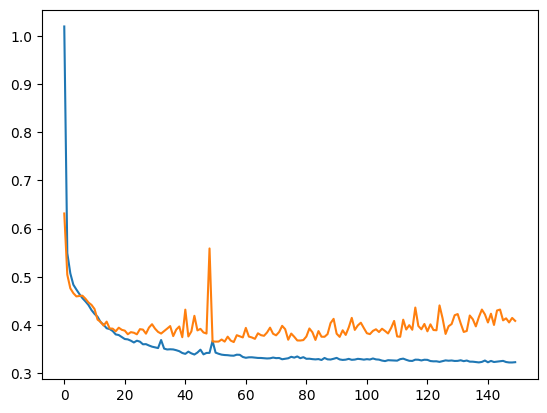

In [125]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

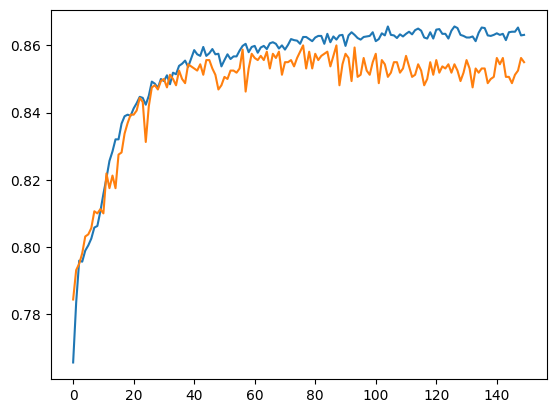

In [126]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8575